# Introduction to ARMA and GARCH processes

***
# Chapter 1: Time Series Fundamentals
***
<br>

Before we start working with ARIMA models, let us introduce/refresh some terminology first.

## Autocovariance and Autocorrelation

<br>

Let $(X_t)_{t \in \mathbb{Z}}$ be a (discrete) stochastic process. In order to measure the dependency structure
to itself but lagged manner, we define the __autocovariance__ function $\gamma(t,s)$ as

<br>
$$ \gamma(s,t) = \mathbb{E}[(X_t - \mu_t)(X_s - \mu_s)] $$
<br>

and the __autocorrelation__ $\rho(s,t)$ function as

<br>
$$ \rho(s,t) = \frac{\gamma(s,t)}{\sqrt{\gamma(s,s)}\sqrt{\gamma(t,t)}}$$
<br>

both functions are a way to measure the linear(!) dependence of the variable given different time periods.

<br>

## Stationarity

<br>

As we have seen in the previous lectures, prices behave randomly, it is not clear how they evolve over time.
In particular, it is impossible to infer any asymptotic behaviour. In order to to predictions we need some
sort of 'stability' criterion. For meaningful predictions using ARMA processes, this property is called stationarity.

<br>

Let $(X_t)_{t \in \mathbb{Z}}$ be a (discrete) stochastic process. The process is called

- __mean stationary__ $: \Leftrightarrow$ for all $t \in T:$ $\mathbb{E}[X_t] = \mu$
- __variance stationary__ $: \Leftrightarrow$ for all $t \in T:$ $\mathbb{V}[X_t] = \sigma^2$
- __covariance stationary__: $: \Leftrightarrow$ for all $s, t, h \in T:$ $\gamma(s,t) = \gamma(s+h,t+h)$

A process which is mean and covariance stationary is also called __weakly stationary__.

<br>

For a stationary time series, the autocovariance is denoted by

<br>
$$\gamma(h) = \mathbb{E}[(X_t - \mu)(X_s - \mu)] \qquad \text{and}$$
<br>

and the autocorrelation can be simplified to

<br>
$$\rho(h) = \frac{\gamma(h)}{\gamma(0)}$$
<br>

Stationarity can be statistically tested using so called unit-root tests, e.g. Augmented-Dickey-Fuller test. We will
review some statistical testing in the later stages of this lecture.

Load all packages

In [ ]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

#### Exercise: Gaussian White Noise

Consider a Gaussian White Noise process $(\varepsilon_t)_{t \in \mathbb{Z}}$. Recall, the variates of
a gaussian white noise process are independent and identically distributed, formally

<br>
$$ \varepsilon_t \stackrel{IID}{\sim} N(0, \sigma_\varepsilon^2) \quad \forall t \in \mathbb{Z}$$
<br>

In the following, simulate a Gaussian White Noise process and review the autocorrelation function.
Explore the numpy random module, i.e. np.random...

In [2]:
gaussian_white_noise = np.random.normal(loc=0, scale=1, size=500)

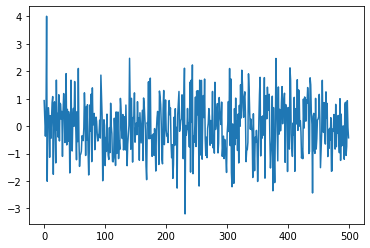

In [3]:
plt.plot(gaussian_white_noise)
plt.show()

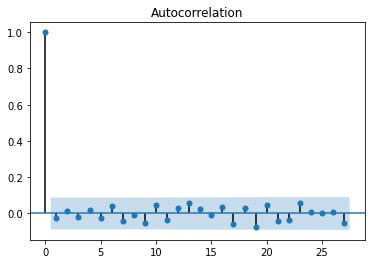

In [4]:
ACF_GWN = plot_acf(gaussian_white_noise)

Since Gaussian White Noise is iid by definition, it is not surprising to see that the lags have little to no
impact on the future values.

#### Exercise: Random Walk (Exercise)

Let us consider the opposite in which the time series is by definition dependent from the past.

Let $(\varepsilon_t)_{t \in \mathbb{Z}}$ be a gaussian white noise process. The simple symmetric random
walk process is defined as

<br>
$$ y_t = y_{t-1} + \varepsilon_t$$
<br>

Note: For simplicity, the constant is kept at zero. The constant is also called a trend.

Simulate a random walk and evaluate the autocorrelation function.

Hint: Use the `np.cumsum` function in order to generate the random walk process.

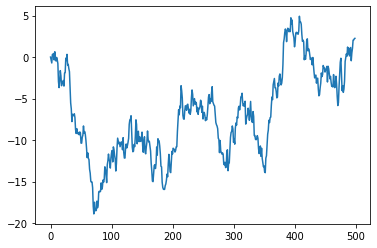

In [5]:
gaussian_innovation = np.random.normal(loc=0, scale=1, size=500)
gaussian_innovation[0]=0

RW = np.cumsum(gaussian_innovation)

plt.plot(RW)
plt.show()

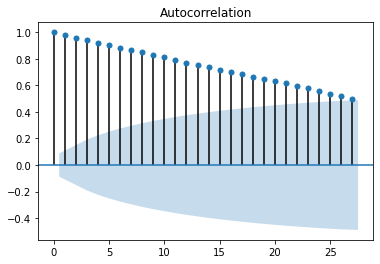

In [6]:
ACF_RW = plot_acf(RW)

<br>

***
# Chapter 2: ARMA Processes
***

<br>

Autoregressive Moving Average models belong to the parametric family of stationary time series.
ARMA models are in particular important since it is possible to approximate a large class of
series in terms of autocovariance functions. [3, p.73]

## Fundamentals

<br>

Let $(\varepsilon_t)_{t \in \mathbb{Z}}$ be a general white noise process.

<br>

---

An __Autoregressive Model of order p__ or __AR(p)__ model is of the form

<br>
$$X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + ... + \phi_p X_{t-p} + \varepsilon_t  $$
<br>

Hence, an autoregressive model is a weighted sum of the past values.

<br>

---

A __Moving Average Model of order q__ or __MA(q)__ is defined by

<br>
$$X_t = \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + ... + \theta_q \varepsilon_{t-q} + \varepsilon_t  $$
<br>

We can see that in this case, the model is determined by the weighted sum of the past innovations and not their
past values themselves.

---

<br>

An __Autoregressive Moving Average Process of order p and q__ or __ARMA(p,q)__ is the summary of both previous
models, i.e.

<br>
$$X_t - \phi_tX_{t-1} - ... - \phi_pX_{t-p} = \varepsilon_t + \theta_t\varepsilon_{t-1} + ... \theta_q\varepsilon_{t-q} $$
<br>

This can model can be written in a more convenient way by using a backshift operator B.

<br>
$$B(x_t) = Bx_{t-1} = x_{t-1} $$
<br>

the ARMA model can be rewritten in the form of

<br>
$$ \phi(B)X_t = \theta(B)\varepsilon_t$$
<br>

where $\phi(\cdot)$ and $\theta(\cdot)$ are the p-th and q-th-degree polynomials, that is

<br>
$$ \phi(x) = 1-\phi_1 x - ... -\phi_p x^p $$
<br>

and

<br>
$$ \theta(x) = 1 + \theta_1 x + ... + \theta_q x^q $$
<br>

simply insert the backshift operator in the polynomial and multiply it with $X_t$.

<br>


#### Example: ARMA(1,1) process

The coefficients follow the notation used in the corresponding polynomials which includes
1 as the zero-lag, i.e. $X_t$, component. AR parameters also have opposite signs!

<br>
$$X_t - \phi_1 X_{t-1} = \varepsilon_t + \theta_1 \varepsilon_{t-1}$$
<br>

which is the same as

<br>
$$X_t = \phi_1 X_{t-1} + \theta_1 \varepsilon_{t-1} + \varepsilon_t$$
<br>


#### Exercise: ARMA process

Simulate an ARMA(1,1) process. Explore the functionality of the `arima_process` module. You
will need the `.arma_generate_sample` method. After generating the sample, generate
a datetime range of your choice and match both time series into a pandas Series.

In [ ]:
from statsmodels.tsa import arima_process
from statsmodels.tsa.arima.model import ARIMA

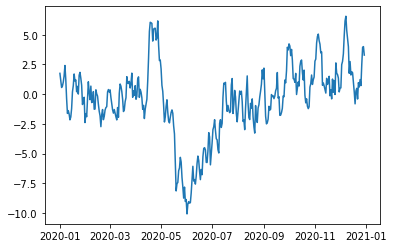

In [8]:
phi_1 = -0.9
theta_1 = 0.1

ar_coefs = [1, phi_1]
ma_coefs = [1, theta_1]

sample = arima_process.arma_generate_sample(ar_coefs, ma_coefs, nsample=365)
dti = pd.date_range("2020-01-01", periods=len(sample), freq="d")
arma_sample = pd.Series(sample, index=dti)

plt.plot(arma_sample)
plt.show()

# Exercise: Check the documentation. Which white noise process is used and what is it's standard deviation?

## Estimation

There are three common ways to estimate the parameters of an ARMA(p,q) process.

- Yule-Walker Estimation (Method of Moments)
- Least-Square Estimation
- Maximum-Likelihood Estimation

We will focus on the Maximum-Likelihood estimator in order to derive the parameters since this is the most common method. However, it requires a specific distribution assumption for the error term $\varepsilon_t$.

A quick reminder, given an ARMA(p,q) model $X_t$, we need to derive the likelihood function which is of the form

<br>
$$ L(\beta, \sigma_w^2)= \prod\limits_{i=1}^{n}f_{X}(x_t|x_{t-1},...,x_1)$$
<br>

where $\beta=(\mu, \phi_1,...\phi_p, \theta_1,...,\theta_q)'$ denotes the vector of parameters. Naturally, the densities depends on the distribution we assume for the white-noise variates. For an explicite derivation of the quantities, see [1, p.116].

Two common numerical optimization routines for computing the maximum likelihood estimator are the Newton-Raphson and Scoring algorithm. For more details, see [1, p.120]


In [9]:
# Fit an ARIMA(1,0,1) = ARMA(1,1) model
model = ARIMA(arma_sample, order=(1,0,1))

model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -507.449
Date:                Thu, 18 Mar 2021   AIC                           1022.899
Time:                        13:12:31   BIC                           1038.498
Sample:                    01-01-2020   HQIC                          1029.098
                         - 12-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2659      0.944     -0.282      0.778      -2.116       1.584
ar.L1          0.9442      0.020     48.360      0.000       0.906       0.982
ma.L1          0.0525      0.057      0.927      0.3

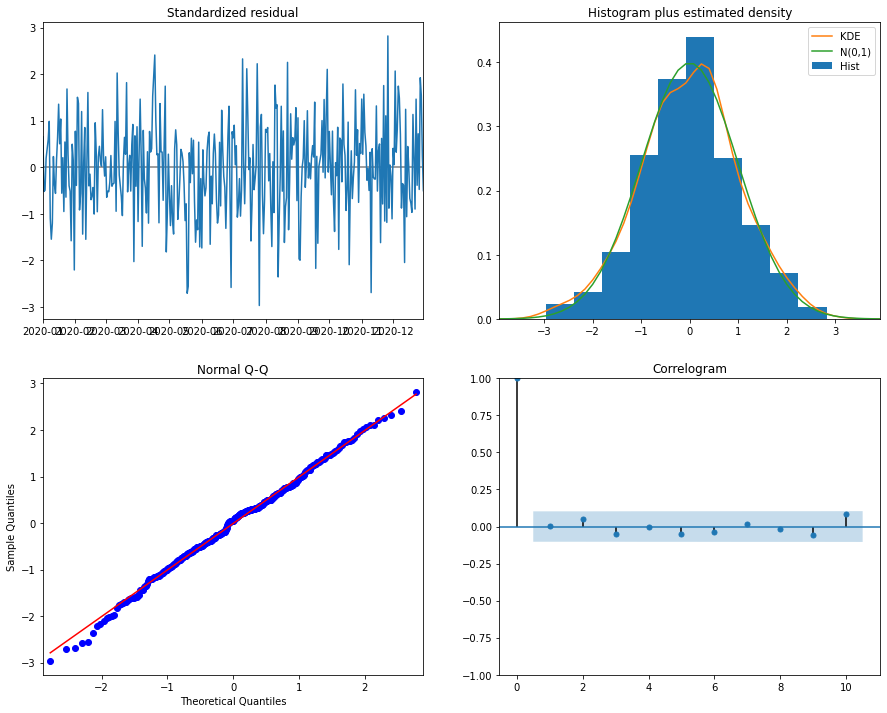

In [10]:
plot_diagonistics = model_fit.plot_diagnostics(figsize=(15, 12))

## Forecasting

Based on a given set of data, we want to predict a future value. Formally,

<br>
$$ x_{n+m}^{(n)} = g(x_1,...,x_n)$$
<br>

where $g(\cdot)$ is some function used for prediction and $x_{n+m}^{(n)}$ denotes the m-step forecast based on n-past values.

Once $g(\cdot)$ is determined and the forecast made. The predicted value needs to be evaluated and compared to the true/realized value. Keep in mind, that the accuracy of a forecast is always tied to a loss function $l(\cdot)$, i.e.

<br>
$$ l(x_{(n+m)}, x_{n+m}^{(n)})$$
<br>

In this lecture, we assume that our models are stationary. We will focus on the class of linear predictors which are of the form

<br>
$$ x_{n+m}^{(n)} = \alpha_0 + \sum\limits_{k=1}^{n}\alpha_kx_k$$
<br>

and set the loss function to be the mean square error

<br>
$$ S(\alpha_0,...,\alpha_n) = l(x_{(n+m)}, x_{n+m}^{(n)}) = \mathbb{E}[(x_{n+m} - x_{n+m}^{(n)})^2] $$
<br>

Given the data, the best linear predictor $x_{n+m}^{(n)}$ for $m\geq1$ is found by solving

<br>
$$\mathbb{E}[(x_{n+m}-x^{(n)}_{n+m})x_k]=0 \qquad k=0,...,n$$
<br>

this set of equations are also called prediction equations and originate from the partial derivatives of the loss function with respect to the parameters $\alpha_0,...,\alpha_n$. The predictor is also called Best-Linear-Predictor (BLP).

The Durbin-Levinson Algorithm is commonly applied to solve the prediction equations.[3, p.60]

Note that forecasting in terms of coding is referred to the predicted mean.

<br>

Suppose we want to forecast some values using the ARMA model built from the previous exercises. First, check
the in-sample prediction.

In [11]:
pred_in = model_fit.get_prediction(start=arma_sample.index[0], end=arma_sample.index[len(arma_sample)-1])

pred_in_conf = pred_in.conf_int(alpha=0.05)
pred_in_mean = pred_in.predicted_mean


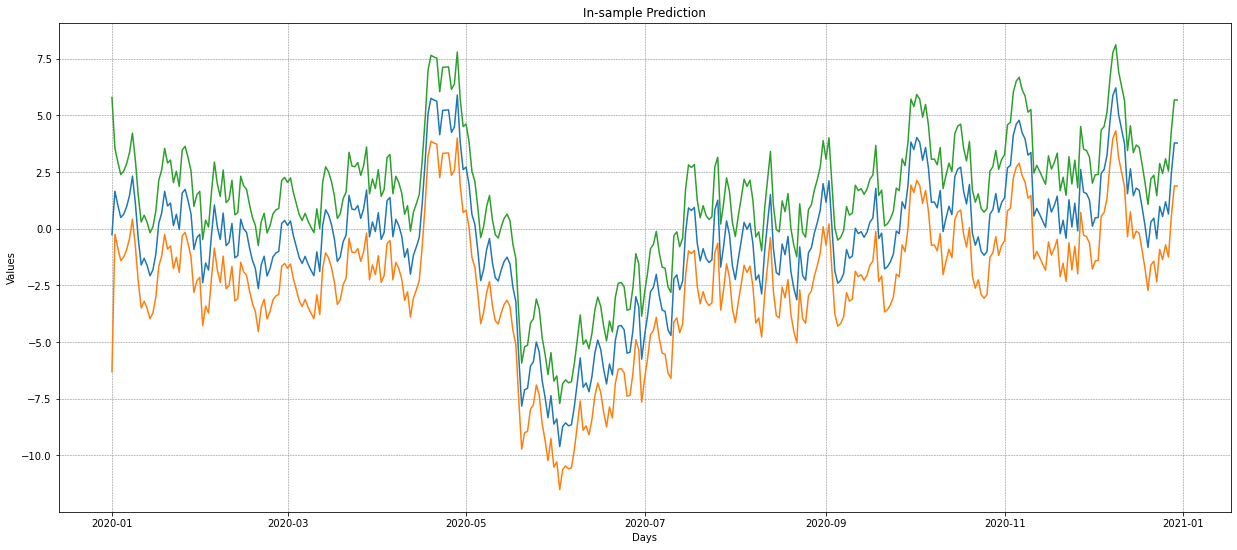

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(21,9)

ax.set_title('In-sample Prediction', fontsize = 12)
ax.set_xlabel('Days')
ax.set_ylabel('Values')
ax.grid(color='grey', linestyle='--', linewidth=0.5)
ax.plot(pred_in_mean)
ax.plot(pred_in_conf)
plt.show()


Thus, the prediction in sample seem to be ok. The one-step ahead forecast is then given by

In [13]:
# Define prediction horizon
begin = arma_sample.index[len(arma_sample)-1]
steps_ahead = datetime.timedelta(days=7)

pred_out = model_fit.get_prediction(start=begin, end= begin+steps_ahead)

pred_out_conf = pred_out.conf_int(alpha=0.05)
pred_out_mean = pred_out.predicted_mean

We will explore the mechanics in a more detailed way in the case study following this lecture.

***
# Chapter 3 : ARCH and GARCH processes
***
<br>

## Fundamentals

<br>

In contrast to ARMA models which assume the variance to be constant, ARCH and GARCH models
allow for time dependent variance. There are also called heteroscedastic models. We will see,
that this process is much better in capturing volatility clusters.

<br>

Recall:

* Volatility is not directly observable
* return series are not serially correlated, however, squared and absolute returns show profound serial
  correlation
* volatility clustering

<br>

### Definition (ARCH process)
Let $(\varepsilon_t)_{t \in \mathbb{Z}}$ be a standard white noise process with $\varepsilon_t \stackrel{IID}{\sim}
  \text{WN}(0,1)$. The process $(x_t)_{t \in \mathbb{Z}}$ is an ARCH(p) process iff

\begin{align}
    x_t &= \sigma_t\varepsilon_t \\
    \sigma_t^2 &= \alpha_0 + \sum_{i=1}^{p}\alpha_i x^2_{t-i}
\end{align}

with $\alpha_0 > 0$ and $\alpha_i \geq 0$ for $i=1,...,p$. The latter restrictions are required because the variance needs to be positive.


<br>

### Some properties of ARCH processes

* An ARCH(p) process is covariance/weakly stationary if: $\quad \sum\limits_{i=1}^p \alpha_i < 1$ <br/>
  If the process is covariance stationary, i.e. stable, the **unconditional** variance is
  well-defined and given by

  \begin{equation} \mathbb{V}[x_t] = \sigma^2 = \dfrac{\alpha_0}{1 - \sum\limits_{i=1}^p \alpha_i} \end{equation}

  The method for computing the unconditional variance is to reformulate the model into a stochastic recurrence equation. Basically, the ARCH process is represented as an ARMA process with $x_{t}^2$ (see [1], p.141). <br/>

* If $x_t$ has finite first moments, the process has the martingale difference property, $\mathbb{E}[x_t|\mathcal{F}_{t-1}]=0$, w.r.t the $\sigma$-algebra generated by $x_t$. In particular, the unconditional mean is zero.

* One can show that the kurtosis of an ARCH process is larger than 3 assuming the fourth
moment is well-defined. This is desirable since a kurtosis $>3$ implies a leptocurtic distribution

* A potential drawback is the requirement of many parameters, i.e. many lags, to model the volatility properly (see ACF and PACF). This problem can be circumvented by including past variance variates instead of past returns (see GARCH)




#### Example: ARCH(1)

With $(\varepsilon_t)_{t \in \mathbb{Z}}$ as standard gaussian white noise process with
$\varepsilon_t \stackrel{IID}{\sim}  \text{N}(0,1)$. An ARCH(1) $(x_t)_{t \in \mathbb{Z}}$ process is of the form

\begin{align}
    x_t &= \sigma_t\varepsilon_t \\
    \sigma_t^2 &= \alpha_0 + \alpha_{1} x^2_{t-1}
\end{align}

with $\alpha_0, \alpha_1 > 0$. The conditional density $x_t|x_{t-1}$ given normal distribution is given by

$$ x_t|x_{t-1} \sim N(0, \alpha_0 + \alpha_1 x^2_{t-1})$$


#### Exercise: Simulate ARCH(1)

Simulate an ARCH(1) process. Define the parameters first. Optionally, preallocate some space
by initializing two vectors of zeros/ones. Generate the time series with a loop. Plot
the time series.

In [14]:
# Define some parameters
a_0 = 0.3
a_1 = 0.3

# Tryout unstable version

n = 500

# Preallocate arrays
wn = np.random.normal(size=n)           # white noise
x = np.zeros(n)                         # final time series
sigma_square = np.zeros(n)              # sigma^2


for i in range(1, n):
    sigma_square[i] = a_0 + a_1*(x[i-1]**2)
    x[i] = wn[i]*np.sqrt(sigma_square[i])


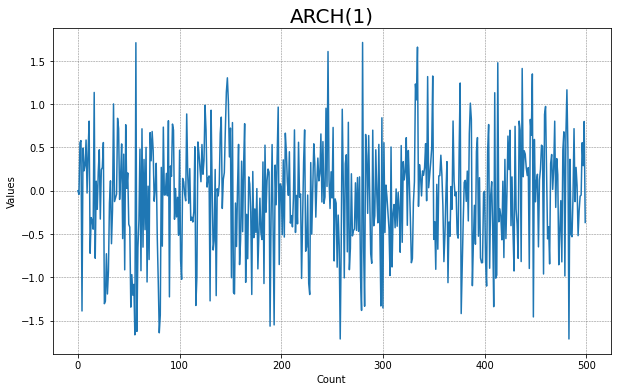

In [15]:
fig, ax = plt.subplots(1)
fig.set_size_inches(10, 6)
ax.set_title('ARCH(1)', fontsize = 20)
ax.set_xlabel('Count')
ax.set_ylabel('Values')
ax.grid(color='grey', linestyle='--', linewidth=0.5)
plt.plot(x)
plt.show()



One natural extension is to include past observation of the variance which leads to the following definition.

### Definition (GARCH process)
Let $(\varepsilon_t)_{t \in \mathbb{Z}}$ be standard white noise, i.e. $\varepsilon_t \stackrel{IID}{\sim}  WN(0,1)$.
The process $(x_t)_{t \in \mathbb{Z}}$ is an GARCH(p,q) process if

\begin{align}
    x_t &= \sigma_t\varepsilon_t \\
    \sigma_t^2 &= \alpha_0 + \sum_{i=1}^{p}\alpha_i x^2_{t-i} + \sum_{j=1}^{p}\beta_i \sigma^2_{t-j}
\end{align}

with $\alpha_0 > 0$ and $\alpha_i \geq 0$ for $i=1,...,p$ and $\beta_i \geq 0$ for $j=1,...,q$.

The history of variance is incorporated to this model.

<br/>

### Some properties of GARCH processes

* High phases of volatility tend to be more **persistent** since $x_t$ is likely to be larger if either $|x_{t-1}|$ or $\sigma_{t-1}$ are large

* A GARCH(p,q) process is covariance stationary if: $\quad \sum\limits_{i=1}^p \alpha_i + \sum\limits_{j=1}^q \beta_j < 1$ <br/>
  This quantity (the sum above) can be seen as a **persistence measure** of shocks to the volatility.
  Similarly, the rate of how fast the past effects and shocks decay. The closer to one, the longer it persists.
  If this is case, similar to above, the unconditional variance is well-defined and is given by
  
  $$\quad \mathbb{V}[x_t] = \sigma^2 = \dfrac{\alpha_0}{1 - \sum\limits_{i=1}^p \alpha_i - \sum\limits_{j=1}^q \beta_j }$$


#### Example: GARCH(1,1)

With $(\varepsilon_t)_{t \in \mathbb{Z}}$ as standard gaussian white noise process with $\varepsilon_t \stackrel{IID}{\sim}  \text{N}(0,1)$. An ARCH(1) $(x_t)_{t \in \mathbb{Z}}$ process is of the form

\begin{align}
    x_t &= \sigma_t\varepsilon_t \\
    \sigma_t^2 &= \alpha_0 + \alpha_{1} x^2_{t-1} + \beta_1\sigma^2_{t-1}
\end{align}

with $\alpha_0, \alpha_1 > 0$. The conditional density $x_t|x_{t-1}$ given normal distribution is given by

$$ x_t|x_{t-1} \sim N(0, \alpha_0 + \alpha_1 x^2_{t-1}+ \beta_1\sigma^2_{t-1})$$

Let's simulate the process:

In [16]:
# Define some parameters
a_0 = 0.2
a_1 = 0.5
b_1 = 0.5

# Tryout persistent and unstable combinations

# Sample size
n = 365

# Preallocate arrays
wn = np.random.normal(size=n)           # white noise
x = np.zeros(n)                         # final time series
sigma_square = np.zeros(n)              # sigma^2


for i in range(1, n):
    sigma_square[i] = a_0 + a_1*(x[i-1]**2) + b_1*sigma_square[i-1]
    x[i] = wn[i]*np.sqrt(sigma_square[i])

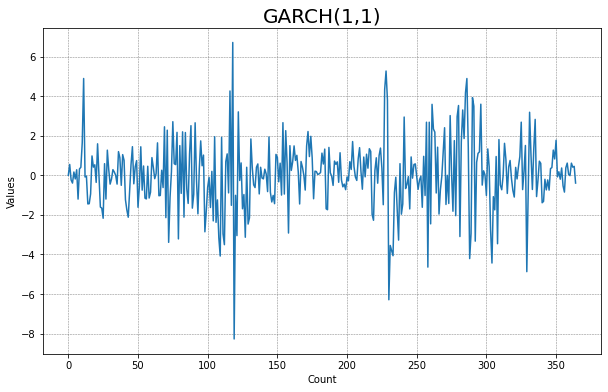

In [17]:
fig, ax = plt.subplots(1)
fig.set_size_inches(10, 6)
ax.set_title('GARCH(1,1)', fontsize = 20)
ax.set_xlabel('Count')
ax.set_ylabel('Values')
ax.grid(color='grey', linestyle='--', linewidth=0.5)
plt.plot(x)
plt.show()

## Estimation

### Conditional Densities

Estimation is usually done with the Maximum-Likelihood method. For that, we have to study the conditional distribution of $x_t$ first.

Given two random variables X,Y, the joint densitiy can be expressed in terms of conditional densities

$$ f_{X|Y}(x|y) = \frac{f_{X,Y}(x,y)}{f_X(x)} \quad \Leftrightarrow \quad f_{X,Y}(x,y) = f_{X|Y}(x|y) * f_X(x)$$

Based on this principle the joint distribution of a collection of random variables $X_0,...,X_T$ can be written as

$$ f_{X_0,...,X_T}(x_0,...,x_T) = f_{X_0}(x_0) \prod_{i=1}^{T} f_{X_t|X_{t-1},...,X_0} (x_t | x_{t-1},...,x_0)$$

The analytical expression of the conditional density $f_{X_t|X_{t-1},...,X_0} (x_t | x_{t-1},...,x_0)$ depends on the model, that is the lag order and distribution assumption.


### Constructing a likelihood function

Again, take a GARCH(1,1) process with standard gaussian white noise. Let $ X= (X_1, ...,X_N)$ denote a collection of random variables. The likelihood function is then of the form

$$ \mathcal{L}(\alpha_0,\alpha_1,\beta_1; X) = f_{X_0}(x_0) * \prod_{t=1}^{N}f_{X_t|X_{t-1}}(x_t|x_{t-1})$$

Usually $f_{X_0}(x_0)$ is not known. However, the effect of this term is negliable if the sample size is large therefore it is moslty droped. The resulting function is also called the conditional likelihood function. With Gaussian innovations, the explicite form of the conditional likelihood function is given by

$$ L(\alpha_0,\alpha_1,\beta_1; X) = \prod_{t=1}^{N} \frac{1}{\sqrt{2\pi\sigma_t^{2}}}\text{exp}(-\frac{x_t^2}{2\sigma_t^2}) \qquad \text{with} \quad \sigma_t^2=\alpha_0+\alpha_1 x_{t-1}^2 + \beta_1 \sigma_{t-1}^2$$

The log-likelihood function is given by

$$ ln(L(\alpha_0,\alpha_1,\beta_1; X)) = \frac{N}{2}ln(2\pi)-\frac{1}{2}\sum_{t=1}^{N}ln(\sigma_t^2)-\frac{1}{2}\sum_{t=1}^{N}\frac{x_t^2}{\sigma_t^2}$$

This function can now be optimized in order to derive the parameters.

Note, that $\sigma_t^2$ and $x_t$ are recursively defined, thus $\sigma_0^2$ and $x_0$ needs to be pre-determined. For $\sigma_0$  the sample variance is mostly usedand $x_0$ is the corresponding value at that given time.


Let's do some estimation on the data given from the previous task.

In [18]:
from arch import arch_model

In [19]:
dti = pd.date_range("2020-01-01", periods=len(x), freq="d")
garch_sample = pd.Series(x, index=dti)

In [20]:
p_lag = 1
q_lag = 1

garch_model = arch_model(garch_sample, p=p_lag, q=q_lag)
garch_model_fit = garch_model.fit(update_freq=0, disp='off')

print(garch_model_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -664.939
Distribution:                  Normal   AIC:                           1337.88
Method:            Maximum Likelihood   BIC:                           1353.48
                                        No. Observations:                  365
Date:                Thu, Mar 18 2021   Df Residuals:                      361
Time:                        13:12:32   Df Model:                            4
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0548  5.866e-02      0.933      0.351 [-6.02

### Homework

Explore the ARCH library: https://arch.readthedocs.io/en/latest/index.html


### References

#### Chapter 1 - Chapter 2


[1] Shumway, Stoffer (2017) - Time Series Analysis and Its Applications - With R Examples

[2] Brockwell, Davis (2006) - Time Series - Theory and Methods

[3] Brockwell, Davis (2016) - Introduction to Time Series and Forecasting


<br>
<br>


#### Chapter 3

[1] McNeil, Frey, Embrechts,(2005), p.139-145

[2] Lütkepohl (2007), p.559-560

[3] Tsay (2010), p.109-171


[A] A nice example with many features on forecasting
https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

